In [1]:
import numpy as np
import pandas as pd
import os

# 1.1 Call sklearn libraries

# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.4 To draw decision tree
from sklearn.tree import export_graphviz

# 1.1.5
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/Arunita.000/Downloads/MLP/Real_fake_news.csv")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,1,1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,2,2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,3,3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,4,4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [5]:
df.columns = list(map(lambda a: a.lstrip(), df.columns))

In [6]:
df.isnull().sum()

Unnamed: 0         0
Unnamed: 0.1       0
author             0
statement          0
source             0
target             0
BinaryTarget       0
BinaryNumTarget    0
dtype: int64

In [7]:
df.shape

(4870, 8)

In [8]:
df['author'].value_counts()

Ciara O'Rourke        669
Tom Kertscher         311
Louis Jacobson        250
Samantha Putterman    242
Jon Greenberg         153
                     ... 
Madison Black           1
Victoria Gennuso        1
Titus Wu                1
Liz Newton              1
Duncan Agnew            1
Name: author, Length: 318, dtype: int64

In [9]:
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

In [10]:
df_final = pd.get_dummies(df)
df_final.head()

,target,BinaryNumTarget,author_Aaron Marshall,author_Aaron Sharockman,author_Adam Thorp,author_Adrianne Uphold,author_Adriel Bettelheim,author_Al Bernardi,author_Alan Gathright,author_Alan Hovorka,...,source_Yard sign,source_Yes On 62 campaign to abolish California's death penalty,source_YouTube videos,source_YourContent,source_Yvette McGee Brown,source_Zach Wahls,source_Zerlina Maxwell,source_teaparty.org,BinaryTarget_FAKE,BinaryTarget_REAL
0,True,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,True,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,True,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,True,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,True,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
num_atr=[]

cat_atr=['author' , 'statement' , 'source']

# KNN Classification

In [12]:
from sklearn.model_selection import train_test_split
X= df.drop(['BinaryNumTarget', 'BinaryTarget', 'target'], axis=1)
y= df['BinaryNumTarget']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [14]:
#le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(LabelEncoder().fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
X_train[cat_atr].head()

,author,statement,source
2174,44,1548,1034
4735,166,627,619
1151,105,603,302
4684,223,1061,295
1528,248,2704,940


In [16]:
Xtr = X_train[cat_atr]
Xtr.shape 

(3409, 3)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [18]:
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)

Xtr1 = X_test[cat_atr] 
Xtr1.shape 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(1461, 3)

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(Xtr1)
confusion_matrix(y_test, y_pred)

array([[ 95, 634],
       [147, 585]], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4654346338124572

In [21]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

(array([0.39256198, 0.47990156]),
 array([0.1303155 , 0.79918033]),
 array([0.19567456, 0.59969247]),
 array([729, 732], dtype=int64))

In [22]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.47990155865463496

In [23]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7991803278688525

In [24]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5996924654023579

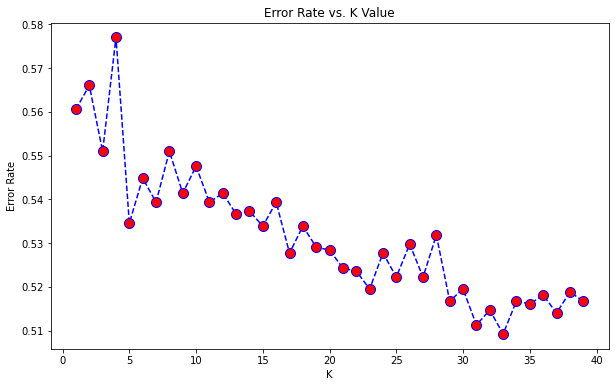

Minimum error:- 0.5092402464065708 at K = 33


In [25]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [26]:
knn = KNeighborsClassifier(n_neighbors=36, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=36)

In [27]:
y_pred = knn.predict(Xtr1)
accuracy_score(y_test, y_pred)

0.48186173853524983

# Decision Tree Classification

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [29]:
X= df.drop(['BinaryNumTarget', 'BinaryTarget', 'target'], axis=1)
y= df['BinaryNumTarget']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [30]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None)
dt.fit(Xtr,y_train)

DecisionTreeClassifier()

In [31]:
y_pred = dt.predict(Xtr1)
np.sum((y_test == y_pred))/y_test.size

0.5160848733744011

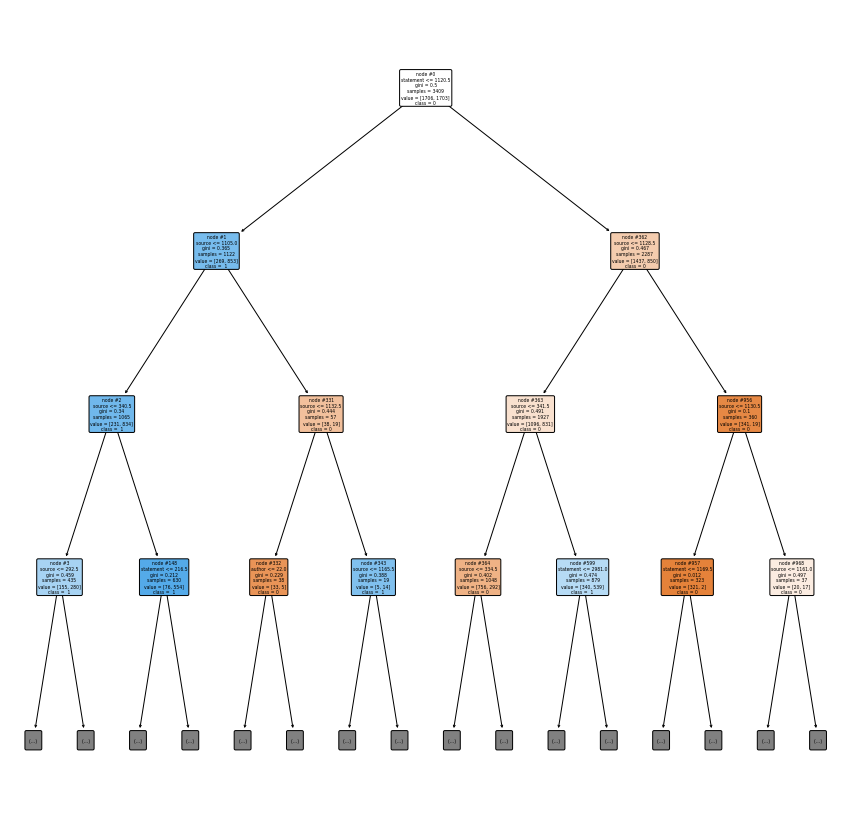

In [32]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dt,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['author', 'statement', 'source', 'target', 'BinaryTarget',
       'BinaryNumTarget'],
            class_names = ['0',' 1']
            )

_=plt.show()

# Random Forest Classifier

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [59]:
X= df.drop(['BinaryNumTarget', 'BinaryTarget', 'target'], axis=1)
y= df['BinaryNumTarget']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [61]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [63]:
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)

Xtr1 = X_test[cat_atr] 
Xtr1.shape 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(1461, 3)

In [64]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

RandomForestClassifier()

In [65]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4804928131416838


In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[ 21, 708],
       [ 51, 681]], dtype=int64)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.03      0.05       729
           1       0.49      0.93      0.64       732

    accuracy                           0.48      1461
   macro avg       0.39      0.48      0.35      1461
weighted avg       0.39      0.48      0.35      1461



In [69]:
from sklearn.ensemble import RandomForestClassifier
#clf=RandomForestClassifier(n_estimators=100)
#clf.fit(X_train,y_train)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

RandomForestClassifier()

In [70]:
df.columns

Index(['author', 'statement', 'source', 'target', 'BinaryTarget',
       'BinaryNumTarget'],
      dtype='object')

In [71]:
df.feature_names = df[['author', 'statement', 'source']]
df.target_names = df['BinaryNumTarget']

<ipython-input-71-10b814720e0d>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.feature_names = df[['author', 'statement', 'source']]
<ipython-input-71-10b814720e0d>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target_names = df['BinaryNumTarget']


In [72]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

2    0.408020
1    0.337932
0    0.254048
dtype: float64

In [73]:
list(zip(df.columns, feature_imp))

[('author', 0.4080201226409079),
 ('statement', 0.33793166855436807),
 ('source', 0.25404820880472406)]

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


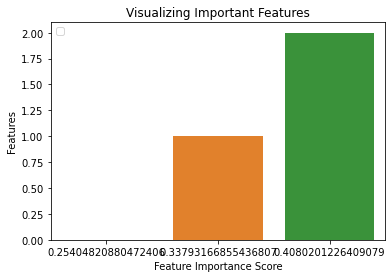

In [74]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
fi = ct.feature_importances_
fi

In [ ]:
from sklearn.ensemble import RandomForestClassifier # using random forest 

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [75]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4804928131416838


When using decision tree , the accuracy was 88% , while using the Random Forest Classifier accuracy has increased to 90%

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.03      0.05       729
           1       0.49      0.93      0.64       732

    accuracy                           0.48      1461
   macro avg       0.39      0.48      0.35      1461
weighted avg       0.39      0.48      0.35      1461

